In [1]:
!pip install graphviz

In [2]:
!pip install hiddenlayer

In [24]:
import torch
import hiddenlayer as hl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import datetime

In [71]:
data = pd.read_csv('train.csv')

In [72]:
data.head()
#data.columns


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [73]:
data['yr'] = data['datetime'].map(lambda x:datetime.datetime.strptime(x[0:10] ,'%Y-%m-%d').year - 2010)
data['mnth'] = data['datetime'].map(lambda x:datetime.datetime.strptime(x[0:10] ,'%Y-%m-%d').month)
data['weekday'] = data['datetime'].map(lambda x:datetime.datetime.strptime(x[0:10] ,'%Y-%m-%d').weekday())
data['season_nm'] = data['season'].map(lambda x:'Spring' if (x==1) else 'Summer' if (x==2) else 'fall' if (x==3) else 'Winter')

# 01_Exploring_Visualizations

Text(0.5, 1.0, 'Number of bikes rented per season')

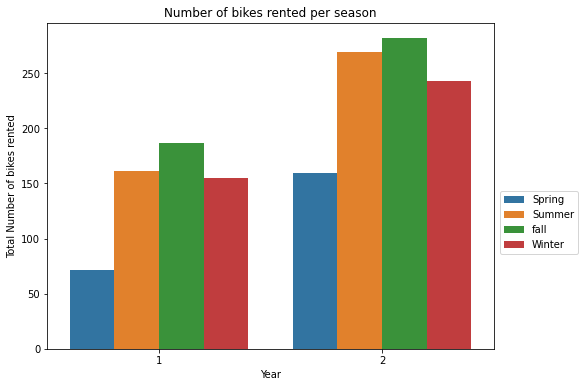

In [44]:
plt.figure(figsize=(8,6))
sns.barplot('yr','count',hue='season_nm',data=data,ci=None)
plt.legend(loc='upper right', bbox_to_anchor=(1.2,0.5))
plt.xlabel('Year')
plt.ylabel('Total Number of bikes rented')
plt.title('Number of bikes rented per season')

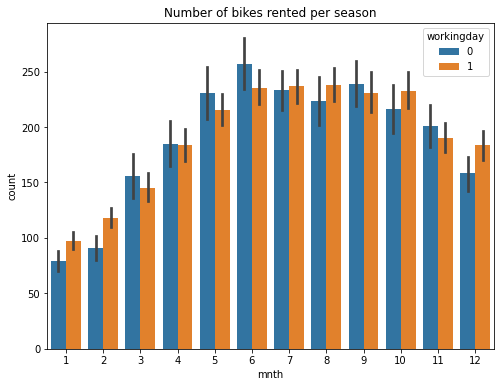

In [46]:
plt.figure(figsize=(8,6))
sns.barplot('mnth','count',hue='workingday',data=data)
plt.title('Number of bikes rented per month')
plt.show()

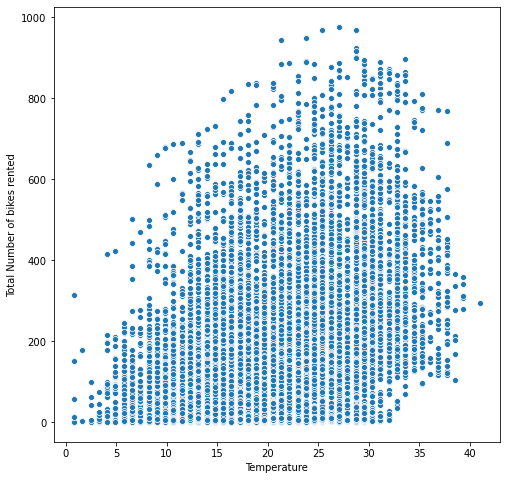

In [49]:
plt.figure(figsize=(8,8))
sns.scatterplot('temp','count',data=data)
plt.xlabel('Temperature')
plt.ylabel('Total Number of bikes rented')
plt.show()

# 02_data_preparation

In [80]:
cols = [ 'registered','holiday','weekday','weather','temp','atemp','season_nm']
features = pd.get_dummies(data[cols],columns=['season_nm'])
target = data[['count']]

In [83]:
from sklearn.model_selection import train_test_split
X_train,x_test, Y_train, y_test = train_test_split(features,target,test_size=0.2)

In [84]:
X_train_tensor = torch.tensor(X_train.values,dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values,dtype=torch.float)

Y_train_tensor = torch.tensor(Y_train.values,dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values,dtype=torch.float)

In [92]:
X_train_tensor.shape

torch.Size([8708, 10])

In [87]:
# to pass data in batches:
import torch.utils.data as data_utils

In [109]:
train_data = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = data_utils.DataLoader(train_data, batch_size=1000,shuffle=True)

In [110]:
# it means a batch of 88 will make an epoch.
print(len(train_loader))
feature_batch, target_batch = iter(train_loader).next()

9


# 03-Trying_Diff_model

In [111]:
# now we are ready to go ahead:
inp = X_train_tensor.shape[1]
out = 1
hid = 10
loss_fn = torch.nn.MSELoss()

In [112]:
model = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                           torch.nn.Linear(hid,out))


(dot.exe:5456): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


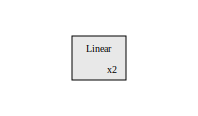

In [113]:
# We have two linear layers so we have:
# linear multiplied by 2.
hl.build_graph(model,torch.zeros([10,inp]))

In [114]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [117]:
total_step = len(train_loader)
num_epochs = 1000

for epoch in range(num_epochs+1):
    for i, (features,target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(epoch % 200 ==0):
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs, i+1, total_step,loss.item()))

Epoch [1/1000], Step [1/9], Loss: 1362.6088
Epoch [1/1000], Step [2/9], Loss: 1501.6002
Epoch [1/1000], Step [3/9], Loss: 1378.5802
Epoch [1/1000], Step [4/9], Loss: 1441.7516
Epoch [1/1000], Step [5/9], Loss: 1548.5133
Epoch [1/1000], Step [6/9], Loss: 1616.5538
Epoch [1/1000], Step [7/9], Loss: 1457.8820
Epoch [1/1000], Step [8/9], Loss: 1393.1676
Epoch [1/1000], Step [9/9], Loss: 1584.2922
Epoch [201/1000], Step [1/9], Loss: 1472.7423
Epoch [201/1000], Step [2/9], Loss: 1334.6799
Epoch [201/1000], Step [3/9], Loss: 1394.1742
Epoch [201/1000], Step [4/9], Loss: 1466.2969
Epoch [201/1000], Step [5/9], Loss: 1311.3666
Epoch [201/1000], Step [6/9], Loss: 1522.1609
Epoch [201/1000], Step [7/9], Loss: 1405.0190
Epoch [201/1000], Step [8/9], Loss: 1416.4741
Epoch [201/1000], Step [9/9], Loss: 1299.8120
Epoch [401/1000], Step [1/9], Loss: 1348.3748
Epoch [401/1000], Step [2/9], Loss: 1343.1140
Epoch [401/1000], Step [3/9], Loss: 1450.5686
Epoch [401/1000], Step [4/9], Loss: 1572.8798
Epoch 

# 04-Model_Evaluation

In [123]:
model.eval()
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)

In [124]:
y_pred = y_pred_tensor.detach().numpy()
print(y_pred.shape)
print(y_test.values.shape)

(2178, 1)

In [127]:
# Great R2-Score here:
sklearn.metrics.r2_score(y_test,y_pred)

0.9590924627874668

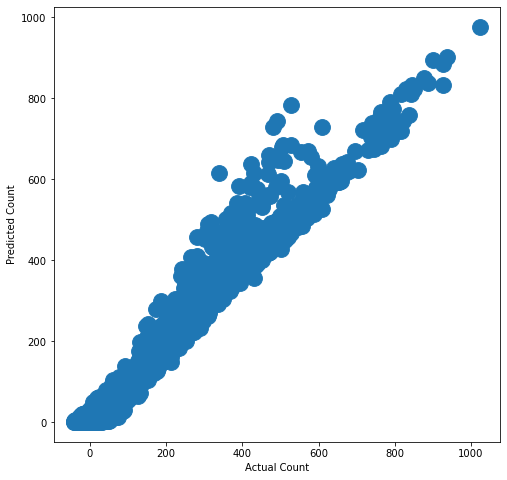

In [128]:
plt.figure(figsize=(8,8))
plt.scatter(y_pred,y_test.values,s=250)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.show()

# 05-Effects of some changes: (ReLU)


(dot.exe:1984): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


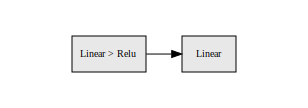

In [130]:
model = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                            torch.nn.ReLU(),
                           torch.nn.Linear(hid,out))

hl.build_graph(model,torch.zeros([10,inp]))

In [131]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [132]:
total_step = len(train_loader)
num_epochs = 1000

for epoch in range(num_epochs+1):
    for i, (features,target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(epoch % 200 ==0):
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs, i+1, total_step,loss.item()))

Epoch [1/1000], Step [1/9], Loss: 68512.0781
Epoch [1/1000], Step [2/9], Loss: 69226.7188
Epoch [1/1000], Step [3/9], Loss: 71103.4297
Epoch [1/1000], Step [4/9], Loss: 67434.5547
Epoch [1/1000], Step [5/9], Loss: 64581.9375
Epoch [1/1000], Step [6/9], Loss: 60567.3438
Epoch [1/1000], Step [7/9], Loss: 74138.1953
Epoch [1/1000], Step [8/9], Loss: 65466.8477
Epoch [1/1000], Step [9/9], Loss: 70771.5156
Epoch [201/1000], Step [1/9], Loss: 1385.3253
Epoch [201/1000], Step [2/9], Loss: 1399.1898
Epoch [201/1000], Step [3/9], Loss: 1460.9807
Epoch [201/1000], Step [4/9], Loss: 1391.2539
Epoch [201/1000], Step [5/9], Loss: 1125.4501
Epoch [201/1000], Step [6/9], Loss: 1455.7612
Epoch [201/1000], Step [7/9], Loss: 1631.0336
Epoch [201/1000], Step [8/9], Loss: 1290.9351
Epoch [201/1000], Step [9/9], Loss: 1234.9421
Epoch [401/1000], Step [1/9], Loss: 1062.9969
Epoch [401/1000], Step [2/9], Loss: 1200.1840
Epoch [401/1000], Step [3/9], Loss: 1333.6493
Epoch [401/1000], Step [4/9], Loss: 1483.25

In [134]:
# Evaluating
model.eval()
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)
    
y_pred = y_pred_tensor.detach().numpy()
print(y_pred.shape)
print(y_test.values.shape)

(2178, 1)
(2178, 1)


R2-Score:  0.9679218094202253


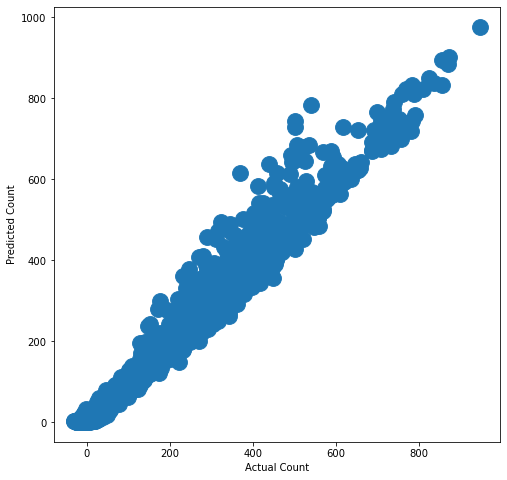

In [135]:
# R2-Score is almost same:
print("R2-Score: ",sklearn.metrics.r2_score(y_test,y_pred))
plt.figure(figsize=(8,8))
plt.scatter(y_pred,y_test.values,s=250)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.show()

# 06-Effect_of_Dropout


(dot.exe:6648): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


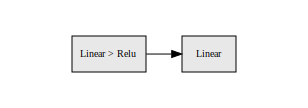

In [143]:
model = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(p=0.2),
                           torch.nn.Linear(hid,out))

hl.build_graph(model,torch.zeros([10,inp]))

In [137]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

total_step = len(train_loader)
num_epochs = 1000

for epoch in range(num_epochs+1):
    for i, (features,target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(epoch % 200 ==0):
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs, i+1, total_step,loss.item()))

Epoch [1/1000], Step [1/9], Loss: 65365.8555
Epoch [1/1000], Step [2/9], Loss: 68662.6484
Epoch [1/1000], Step [3/9], Loss: 67917.3594
Epoch [1/1000], Step [4/9], Loss: 68322.5547
Epoch [1/1000], Step [5/9], Loss: 67475.3047
Epoch [1/1000], Step [6/9], Loss: 64617.7109
Epoch [1/1000], Step [7/9], Loss: 68181.2578
Epoch [1/1000], Step [8/9], Loss: 69043.6484
Epoch [1/1000], Step [9/9], Loss: 66362.3906
Epoch [201/1000], Step [1/9], Loss: 4363.5029
Epoch [201/1000], Step [2/9], Loss: 5412.5591
Epoch [201/1000], Step [3/9], Loss: 5129.7344
Epoch [201/1000], Step [4/9], Loss: 5534.8452
Epoch [201/1000], Step [5/9], Loss: 4289.8877
Epoch [201/1000], Step [6/9], Loss: 4788.3652
Epoch [201/1000], Step [7/9], Loss: 5136.6724
Epoch [201/1000], Step [8/9], Loss: 4955.5010
Epoch [201/1000], Step [9/9], Loss: 4518.2021
Epoch [401/1000], Step [1/9], Loss: 5077.8247
Epoch [401/1000], Step [2/9], Loss: 4271.1973
Epoch [401/1000], Step [3/9], Loss: 4837.5322
Epoch [401/1000], Step [4/9], Loss: 4783.25

In [138]:
# Evaluating
model.eval()
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)
    
y_pred = y_pred_tensor.detach().numpy()
print(y_pred.shape)
print(y_test.values.shape)

(2178, 1)
(2178, 1)


R2-Score:  0.9603067974313069


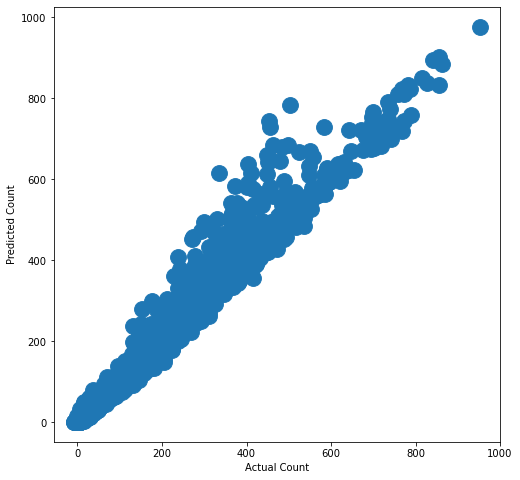

In [139]:
# R2-Score is almost same:
print("R2-Score: ",sklearn.metrics.r2_score(y_test,y_pred))
plt.figure(figsize=(8,8))
plt.scatter(y_pred,y_test.values,s=250)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.show()

# 07-Effect_of_Sigmoid


(dot.exe:7152): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


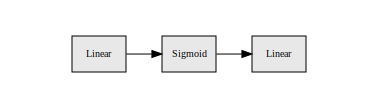

In [144]:
model = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                            torch.nn.Sigmoid(),
                           torch.nn.Linear(hid,out))

hl.build_graph(model,torch.zeros([10,inp]))

In [145]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

total_step = len(train_loader)
num_epochs = 1000

for epoch in range(num_epochs+1):
    for i, (features,target) in enumerate(train_loader):
        output = model(features)
        loss = loss_fn(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if(epoch % 200 ==0):
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1,num_epochs, i+1, total_step,loss.item()))

Epoch [1/1000], Step [1/9], Loss: 66810.6094
Epoch [1/1000], Step [2/9], Loss: 71468.6484
Epoch [1/1000], Step [3/9], Loss: 63048.5625
Epoch [1/1000], Step [4/9], Loss: 69293.1484
Epoch [1/1000], Step [5/9], Loss: 73482.7266
Epoch [1/1000], Step [6/9], Loss: 62764.1523
Epoch [1/1000], Step [7/9], Loss: 74056.5156
Epoch [1/1000], Step [8/9], Loss: 74268.2578
Epoch [1/1000], Step [9/9], Loss: 72164.7969
Epoch [201/1000], Step [1/9], Loss: 64833.8047
Epoch [201/1000], Step [2/9], Loss: 65707.8047
Epoch [201/1000], Step [3/9], Loss: 67754.4844
Epoch [201/1000], Step [4/9], Loss: 66408.3750
Epoch [201/1000], Step [5/9], Loss: 63267.2656
Epoch [201/1000], Step [6/9], Loss: 66112.6172
Epoch [201/1000], Step [7/9], Loss: 60785.6836
Epoch [201/1000], Step [8/9], Loss: 69800.6797
Epoch [201/1000], Step [9/9], Loss: 59415.7188
Epoch [401/1000], Step [1/9], Loss: 60204.0195
Epoch [401/1000], Step [2/9], Loss: 69031.0391
Epoch [401/1000], Step [3/9], Loss: 62103.5508
Epoch [401/1000], Step [4/9], L

In [146]:
# Evaluating
model.eval()
with torch.no_grad():
    y_pred_tensor = model(x_test_tensor)
    
y_pred = y_pred_tensor.detach().numpy()
print(y_pred.shape)
print(y_test.values.shape)

(2178, 1)
(2178, 1)


R2-Score:  -0.5236482553640791


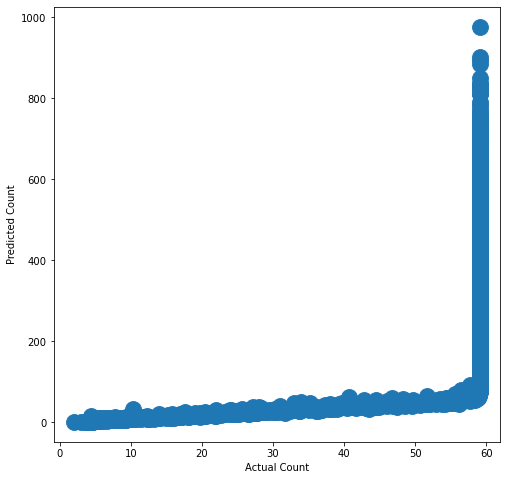

In [147]:
# R2-Score is extremely bad:
print("R2-Score: ",sklearn.metrics.r2_score(y_test,y_pred))
plt.figure(figsize=(8,8))
plt.scatter(y_pred,y_test.values,s=250)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.show()

In [ ]:
# Hence from all above use:
# Using only ReLU performed the best model.